In [1]:
#https://github.com/kmsravindra/ML-AI-experiments/blob/master/AI/LSTM-time_series/LSTM%20-%20Sine%20wave%20predictor.ipynb
#https://towardsdatascience.com/using-lstms-to-forecast-time-series-4ab688386b1f
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [0]:
series = pd.read_excel('/content/snow only.xlsx', header=None )

In [3]:
series.head()

,0
0,6790.325
1,6497.100
2,6900.650
3,5850.500
4,4088.100


In [4]:
series.shape

(204, 1)

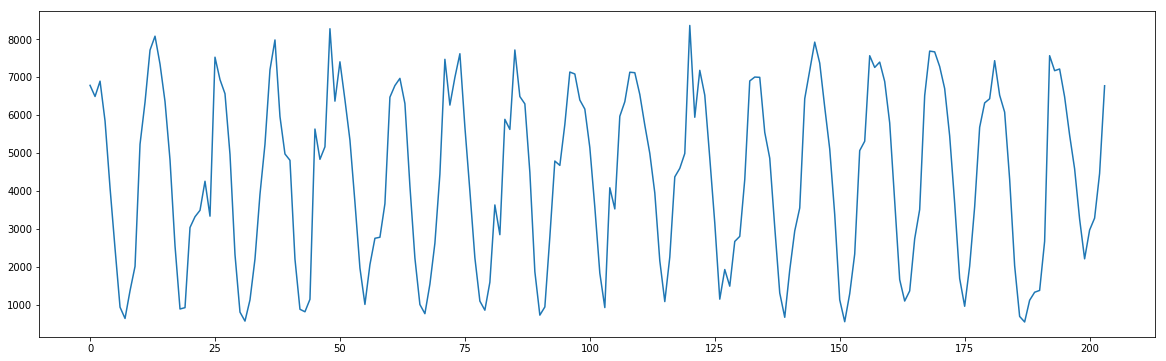

In [5]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()

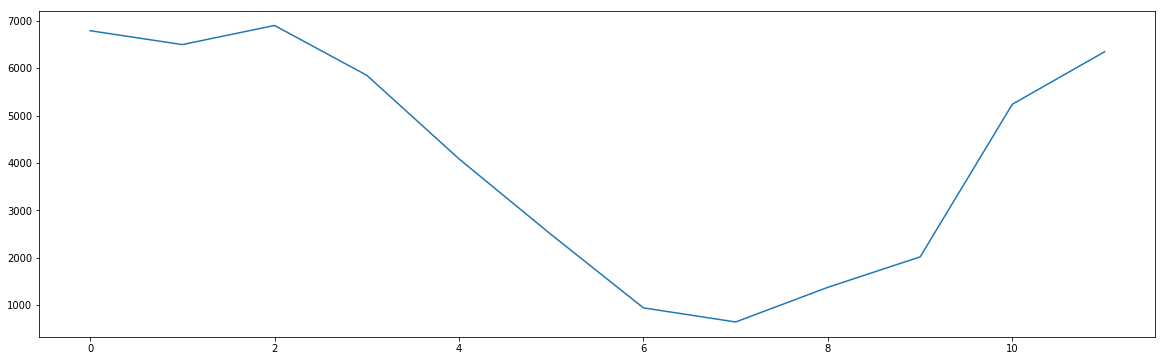

In [6]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values[:12])
pyplot.show()

In [0]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(series.values)
series = pd.DataFrame(scaled)

In [0]:
window_size = 12

series_s = series.copy()
for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)
    
series.dropna(axis=0, inplace=True)

In [9]:

series.head()

,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.596052,0.520988,0.624295,0.355461,-0.095705,-0.504542,-0.900209,-0.976278,-0.789126,-0.624958,0.199144,0.482467,0.834013
1,0.520988,0.624295,0.355461,-0.095705,-0.504542,-0.900209,-0.976278,-0.789126,-0.624958,0.199144,0.482467,0.834013,0.927675
2,0.624295,0.355461,-0.095705,-0.504542,-0.900209,-0.976278,-0.789126,-0.624958,0.199144,0.482467,0.834013,0.927675,0.739019
3,0.355461,-0.095705,-0.504542,-0.900209,-0.976278,-0.789126,-0.624958,0.199144,0.482467,0.834013,0.927675,0.739019,0.486471
4,-0.095705,-0.504542,-0.900209,-0.976278,-0.789126,-0.624958,0.199144,0.482467,0.834013,0.927675,0.739019,0.486471,0.092637


In [10]:
series.shape

(192, 13)

In [0]:

nrow = round(0.75*series.shape[0])

In [12]:
nrow

144

In [0]:

train = series.iloc[:nrow, :]
test = series.iloc[nrow:,:]

In [14]:
test.shape

(48, 13)

In [0]:
from sklearn.utils import shuffle
train = shuffle(train)

In [16]:
train.shape

(144, 13)

In [0]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [0]:
train_X = train_X.values
train_y = train_y.values
test_X = test_X.values
test_y = test_y.values

In [19]:
train_X.shape
train_y.shape
test_X.shape
test_y.shape

(48,)

In [0]:

train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)


In [21]:
train_X.shape
train_y.shape
test_X.shape
test_y.shape

(48,)

In [52]:
model = Sequential()
model.add(LSTM(input_shape = (12,1), output_dim= 12, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(90))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(12, 1), return_sequences=True, units=12)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 12, 12)            672       
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 90)                37080     
_________________________________________________________________
dropout_6 (Dropout)          (None, 90)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 91        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 37,843
Trainable params: 37,843
Non-trainable params: 0
_________________________________________________________________


In [53]:
start = time.time()
model.fit(train_X,train_y,batch_size=15,nb_epoch=100,validation_split=0.1)
print("> Compilation Time : ", time.time() - start)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 129 samples, validate on 15 samples
Epoch 1/100
129/129 [==============================] - 2s 13ms/step - loss: 0.3125 - val_loss: 0.4233
Epoch 2/100
129/129 [==============================] - 0s 1ms/step - loss: 0.2868 - val_loss: 0.3738
Epoch 3/100
129/129 [==============================] - 0s 1ms/step - loss: 0.2386 - val_loss: 0.2673
Epoch 4/100
129/129 [==============================] - 0s 1ms/step - loss: 0.1505 - val_loss: 0.0789
Epoch 5/100
129/129 [==============================] - 0s 1ms/step - loss: 0.0956 - val_loss: 0.1312
Epoch 6/100
129/129 [==============================] - 0s 1ms/step - loss: 0.1066 - val_loss: 0.0739
Epoch 7/100
129/129 [==============================] - 0s 1ms/step - loss: 0.0973 - val_loss: 0.0883
Epoch 8/100
129/129 [==============================] - 0s 1ms/step - loss: 0.1011 - val_loss: 0.0832
Epoch 9/100
129/129 [==============================] - 0s 1ms/step - loss: 0.0877 - val_loss: 0.0728
Epoch 10/100
129/129 [=======================

In [0]:
preds = model.predict(test_X)

In [0]:
preds = scaler.inverse_transform(preds)

In [56]:
preds.shape

(48, 1)

In [0]:
teest=np.asmatrix(test_y)
teest
actuals = scaler.inverse_transform(teest)

In [0]:
#mean_squared_error(actuals,preds)

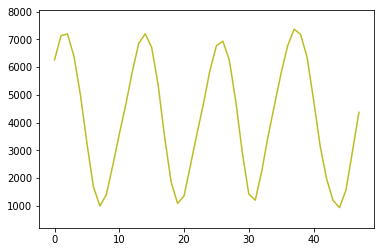

In [59]:
pyplot.plot(actuals)
pyplot.plot(preds)
pyplot.show()

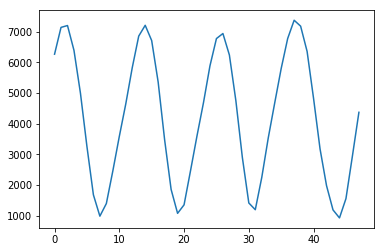

In [60]:
pyplot.plot(preds)
pyplot.show()

In [0]:
def moving_test_window_preds(n_future_preds):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    preds_moving = []                                    # Use this to store the prediction made on each test window
    moving_test_window = [test_X[0,:].tolist()]          # Creating the first test window
    moving_test_window = np.array(moving_test_window)    # Making it an numpy array
    
    for i in range(n_future_preds):
        preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
        preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
        preds_one_step = preds_one_step.reshape(1,1,1) # Reshaping the prediction to 3D array for concatenation with moving test window
        moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
      
    preds_moving=np.asmatrix(preds_moving)
    
    preds_moving = scaler.inverse_transform(preds_moving)
    
    return preds_moving

In [62]:

preds_moving = moving_test_window_preds(98)
preds_moving

array([[6263.599 , 7107.3374, 7151.841 , 6326.3604, 4882.6514, 3039.7302,
        1411.3475,  884.7601, 1596.8606, 2965.802 , 4300.4014, 5386.861 ,
        6383.073 , 7037.3506, 7035.426 , 6200.9243, 4686.7847, 2939.945 ,
        1549.7188, 1097.8002, 1808.1207, 3107.7136, 4350.303 , 5456.294 ,
        6408.826 , 6997.4653, 6928.627 , 6050.8926, 4535.443 , 2875.2334,
        1608.5837, 1244.4562, 1984.2665, 3247.0205, 4454.203 , 5532.168 ,
        6441.4897, 6967.436 , 6831.5244, 5909.301 , 4400.469 , 2803.1577,
        1628.9552, 1361.9548, 2145.7124, 3382.9907, 4557.7124, 5607.799 ,
        6477.195 , 6943.314 , 6741.6865, 5774.322 , 4268.398 , 2721.7073,
        1632.6974, 1465.5347, 2295.304 , 3511.6772, 4658.3804, 5683.5186,
        6514.7227, 6922.328 , 6655.3477, 5641.7793, 4135.6367, 2634.8684,
        1629.5333, 1561.2697, 2435.2234, 3634.1577, 4757.0366, 5759.2876,
        6552.939 , 6902.223 , 6569.6553, 5509.367 , 4001.9553, 2545.8252,
        1624.0654, 1652.6212, 2567.936

In [63]:
actuals

array([[7571.25      , 7262.175     , 7403.6       , 6891.80000026,
        5800.325     , 3722.85833333, 1671.75833333, 1107.2166666 ,
        1373.725     , 2746.575     , 3518.375     , 6518.925     ,
        7693.075     , 7672.5       , 7286.4       , 6705.60000063,
        5459.        , 3687.45      , 1700.175     ,  969.39999996,
        2027.225     , 3590.225     , 5685.3       , 6327.45      ,
        6437.575     , 7440.59999967, 6530.95      , 6084.20000037,
        4318.575     , 2039.05      ,  702.1       ,  555.63333337,
        1127.6       , 1338.825     , 1387.275     , 2680.25      ,
        7572.15      , 7176.825     , 7221.15      , 6487.40000044,
        5481.075     , 4591.575     , 3267.6       , 2219.76666667,
        2977.425     , 3291.925     , 4468.9000003 , 6779.725     ]])

In [0]:
predicted=[6263.599 , 7107.3374, 7151.841 , 6326.3604, 4882.6514, 3039.7302,
        1411.3475,  884.7601, 1596.8606, 2965.802 , 4300.4014, 5386.861 ,
        6383.073 , 7037.3506, 7035.426 , 6200.9243, 4686.7847, 2939.945 ,
        1549.7188, 1097.8002, 1808.1207, 3107.7136, 4350.303 , 5456.294 ,
        6408.826 , 6997.4653, 6928.627 , 6050.8926, 4535.443 , 2875.2334,
        1608.5837, 1244.4562, 1984.2665, 3247.0205, 4454.203 , 5532.168 ,
        6441.4897, 6967.436 , 6831.5244, 5909.301 , 4400.469 , 2803.1577,
        1628.9552, 1361.9548, 2145.7124, 3382.9907, 4557.7124, 5607.799 ,
        6477.195 , 6943.314 , 6741.6865, 5774.322 , 4268.398 , 2721.7073,
        1632.6974, 1465.5347, 2295.304 , 3511.6772, 4658.3804, 5683.5186,
        6514.7227, 6922.328 , 6655.3477, 5641.7793, 4135.6367, 2634.8684,
        1629.5333, 1561.2697, 2435.2234, 3634.1577, 4757.0366, 5759.2876,
        6552.939 , 6902.223 , 6569.6553, 5509.367 , 4001.9553, 2545.8252,
        1624.0654, 1652.6212, 2567.9363, 3751.9746, 4854.1953, 5834.801 ,
        6590.7705, 6881.2705, 6482.7495, 5376.029 , 3867.8413, 2456.626 ,
        1618.992 , 1742.0598, 2695.4512, 3866.2263, 4950.093 , 5909.678 ,
        6627.291 , 6858.178 ]
actual=[7571.25      , 7262.175     , 7403.6       , 6891.80000026,
        5800.325     , 3722.85833333, 1671.75833333, 1107.2166666 ,
        1373.725     , 2746.575     , 3518.375     , 6518.925     ,
        7693.075     , 7672.5       , 7286.4       , 6705.60000063,
        5459.        , 3687.45      , 1700.175     ,  969.39999996,
        2027.225     , 3590.225     , 5685.3       , 6327.45      ,
        6437.575     , 7440.59999967, 6530.95      , 6084.20000037,
        4318.575     , 2039.05      ,  702.1       ,  555.63333337,
        1127.6       , 1338.825     , 1387.275     , 2680.25      ,
        7572.15      , 7176.825     , 7221.15      , 6487.40000044,
        5481.075     , 4591.575     , 3267.6       , 2219.76666667,
        2977.425     , 3291.925     , 4468.9000003 , 6779.725     ]

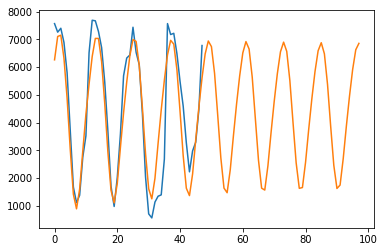

In [65]:
pyplot.plot(actual)
pyplot.plot(predicted)
pyplot.title("LSTM's Forecasting")
pyplot.xlabel('Forecasting')
pyplot.ylabel('Snow cover')
pyplot.show()